# 1. Importing Libraries

In [1]:
library(dplyr)
library(padr)
library(Metrics)
library(tseries)
library(forecast)
library(prophet)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following object is masked from ‘package:Metrics’:

    accuracy


Loading required package: Rcpp

Loading required package: rlang


Attaching package: ‘rlang’


The following object is masked from ‘package:Metrics’:

    ll




# 2. Importing Data

In [2]:
train <- read.csv("../input/ipba-13-unext-jigsaw-time-series-forecasting-png/train.csv")
test <- read.csv("../input/ipba-13-unext-jigsaw-time-series-forecasting-png/test.csv")
ss <- read.csv("../input/ipba-13-unext-jigsaw-time-series-forecasting-png/sample_submission.csv")
holidays <- read.csv("../input/ipba-13-unext-jigsaw-time-series-forecasting-png/holidays.csv")

# 3. Checking Data

In [3]:
head(train)
tail(train)
summary(train)

head(test)
tail(test)
summary(test)

head(ss)
tail(ss)
summary(ss)

head(holidays)
tail(holidays)
summary(holidays)

,date,transactions
,<chr>,<int>
1,01-01-2013,770
2,02-01-2013,93215
3,03-01-2013,78504
4,04-01-2013,78494
5,05-01-2013,93573
6,06-01-2013,90464


,date,transactions
,<chr>,<int>
1450,26-12-2016,105524
1451,27-12-2016,95643
1452,28-12-2016,103717
1453,29-12-2016,102665
1454,30-12-2016,127771
1455,31-12-2016,135568


     date            transactions   
 Length:1455        Min.   :   770  
 Class :character   1st Qu.: 75596  
 Mode  :character   Median : 80387  
                    Mean   : 83491  
                    3rd Qu.: 90166  
                    Max.   :171169  

,date,id
,<chr>,<int>
1,01-01-2017,0
2,02-01-2017,1
3,03-01-2017,2
4,04-01-2017,3
5,05-01-2017,4
6,06-01-2017,5


,date,id
,<chr>,<int>
222,10-08-2017,221
223,11-08-2017,222
224,12-08-2017,223
225,13-08-2017,224
226,14-08-2017,225
227,15-08-2017,226


     date                 id       
 Length:227         Min.   :  0.0  
 Class :character   1st Qu.: 56.5  
 Mode  :character   Median :113.0  
                    Mean   :113.0  
                    3rd Qu.:169.5  
                    Max.   :226.0  

,id,transactions
,<int>,<int>
1,0,70000
2,1,70000
3,2,70000
4,3,70000
5,4,70000
6,5,70000


,id,transactions
,<int>,<int>
222,221,70000
223,222,70000
224,223,70000
225,224,70000
226,225,70000
227,226,70000


       id         transactions  
 Min.   :  0.0   Min.   :70000  
 1st Qu.: 56.5   1st Qu.:70000  
 Median :113.0   Median :70000  
 Mean   :113.0   Mean   :70000  
 3rd Qu.:169.5   3rd Qu.:70000  
 Max.   :226.0   Max.   :70000  

,Date,Holidays
,<chr>,<int>
1,02-03-2012,1
2,01-04-2012,1
3,12-04-2012,1
4,14-04-2012,1
5,21-04-2012,1
6,12-05-2012,1


,Date,Holidays
,<chr>,<int>
307,21-12-2017,1
308,22-12-2017,2
309,23-12-2017,1
310,24-12-2017,1
311,25-12-2017,1
312,26-12-2017,1


     Date              Holidays    
 Length:312         Min.   :1.000  
 Class :character   1st Qu.:1.000  
 Mode  :character   Median :1.000  
                    Mean   :1.122  
                    3rd Qu.:1.000  
                    Max.   :4.000  

# 4. Missing Values Treatment

In [4]:
is.na(train)
is.na(test)
is.na(ss)
is.na(holidays)

date,transactions
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE


date,id
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE


id,transactions
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE


Date,Holidays
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE


In [5]:
head(train$date)
train$date<-as.Date(train$date, format="%d-%m-%Y")
head(train$date)

[1] "01-01-2013" "02-01-2013" "03-01-2013" "04-01-2013" "05-01-2013"
[6] "06-01-2013"

[1] "2013-01-01" "2013-01-02" "2013-01-03" "2013-01-04" "2013-01-05"
[6] "2013-01-06"

In [6]:
head(holidays$Date)
holidays$Date<-as.Date(holidays$Date, format="%d-%m-%Y")
head(holidays$Date)

[1] "02-03-2012" "01-04-2012" "12-04-2012" "14-04-2012" "21-04-2012"
[6] "12-05-2012"

[1] "2012-03-02" "2012-04-01" "2012-04-12" "2012-04-14" "2012-04-21"
[6] "2012-05-12"

#Missing values in date columns

In [7]:
train <- train %>% pad
train$transactions %>% is.na %>% sum
train <- train %>% pad %>% fill_by_value(transactions, value = 0)
subset(train,train$transactions=="0")
tail(train,n=10)

pad applied on the interval: day



[1] 6

pad applied on the interval: day



,date,transactions
,<date>,<dbl>
359,2013-12-25,0
724,2014-12-25,0
1089,2015-12-25,0
1096,2016-01-01,0
1098,2016-01-03,0
1455,2016-12-25,0


,date,transactions
,<date>,<dbl>
1452,2016-12-22,138892
1453,2016-12-23,156932
1454,2016-12-24,167542
1455,2016-12-25,0
1456,2016-12-26,105524
1457,2016-12-27,95643
1458,2016-12-28,103717
1459,2016-12-29,102665
1460,2016-12-30,127771


Finding the Average of 1st Jan

In [8]:
Jan_1_2013 <-subset(train,train$date=="2013-01-01")
Jan_1_2014 <-subset(train,train$date=="2014-01-01")
Jan_1_2015 <-subset(train,train$date=="2015-01-01")
round((Jan_1_2013$transactions+Jan_1_2014$transactions+Jan_1_2015$transactions)/3,0)

[1] 1433

Finding the Average of 3rd of January

In [9]:
Jan_3_2013 <-subset(train,train$date=="2013-01-03")
Jan_3_2014 <-subset(train,train$date=="2014-01-03")
Jan_3_2015 <-subset(train,train$date=="2015-01-03")
round((Jan_3_2013$transactions+Jan_3_2014$transactions+Jan_3_2015$transactions)/3,0)

[1] 86427

In [10]:
train$transactions[train$date == '2016-01-01'] <- 1433
subset(train,train$date=="2016-01-01")

,date,transactions
,<date>,<dbl>
1096,2016-01-01,1433


In [11]:
train$transactions[train$date == '2016-01-03'] <- 86427
subset(train,train$date=="2016-01-03")

,date,transactions
,<date>,<dbl>
1098,2016-01-03,86427


# 5. Data Manipulation

Matching the holidays with the train dataset

In [12]:
colnames(holidays) <- c('date','holiday')
holidays_1 <- left_join(train,holidays,by='date')
colSums(is.na(holidays_1))
holidays_1$holiday[is.na(holidays_1$holiday)] <- 0
colSums(is.na(holidays_1))
colnames(holidays_1) <- c('ds','y','holiday')

date transactions      holiday 
           0            0         1231

date transactions      holiday 
           0            0            0

In [13]:
holidays_2 <- data.frame(holidays_1$ds,holidays_1$holiday)
colnames(holidays_2) <- c('ds','holiday')
tail(holidays_2)

,ds,holiday
,<date>,<dbl>
1456,2016-12-26,1
1457,2016-12-27,0
1458,2016-12-28,0
1459,2016-12-29,0
1460,2016-12-30,0
1461,2016-12-31,1


In [14]:
holidays_1$y<-tsclean(holidays_1$y, replace.missing = TRUE, iterate = 10, lambda = "auto")

Warning message in guerrero(x, lower, upper):
“Guerrero's method for selecting a Box-Cox parameter (lambda) is given for strictly positive data.”


# 6. EDA

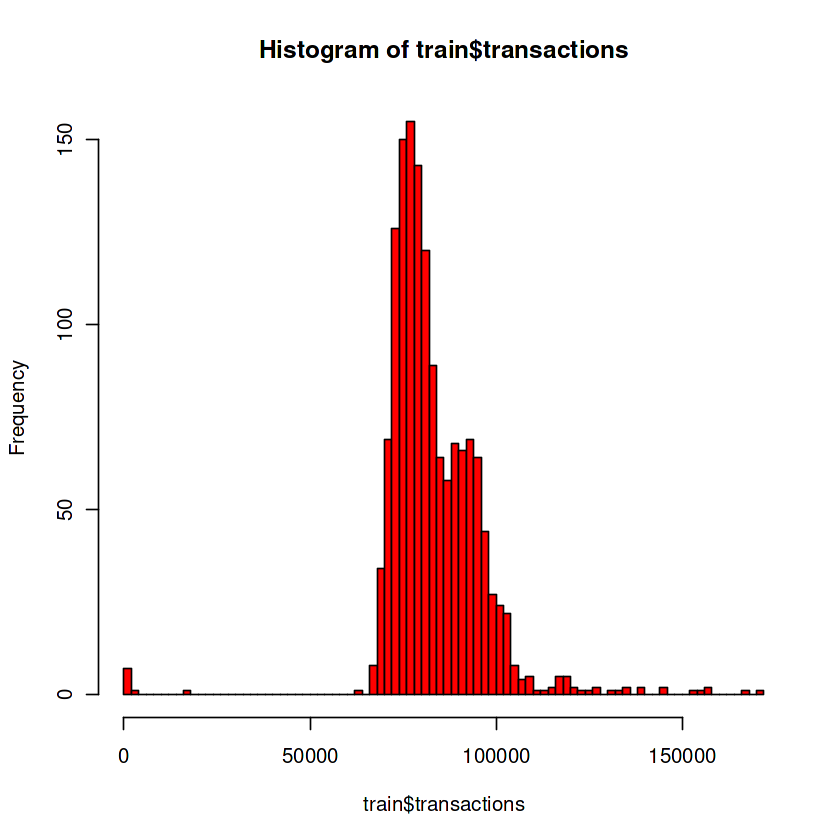

In [15]:
hist(train$transactions, breaks=100, col="red")

In [16]:
adf.test(diff(train$transactions), alternative="stationary", k=0)

Warning message in adf.test(diff(train$transactions), alternative = "stationary", :
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff(train$transactions)
Dickey-Fuller = -53.794, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


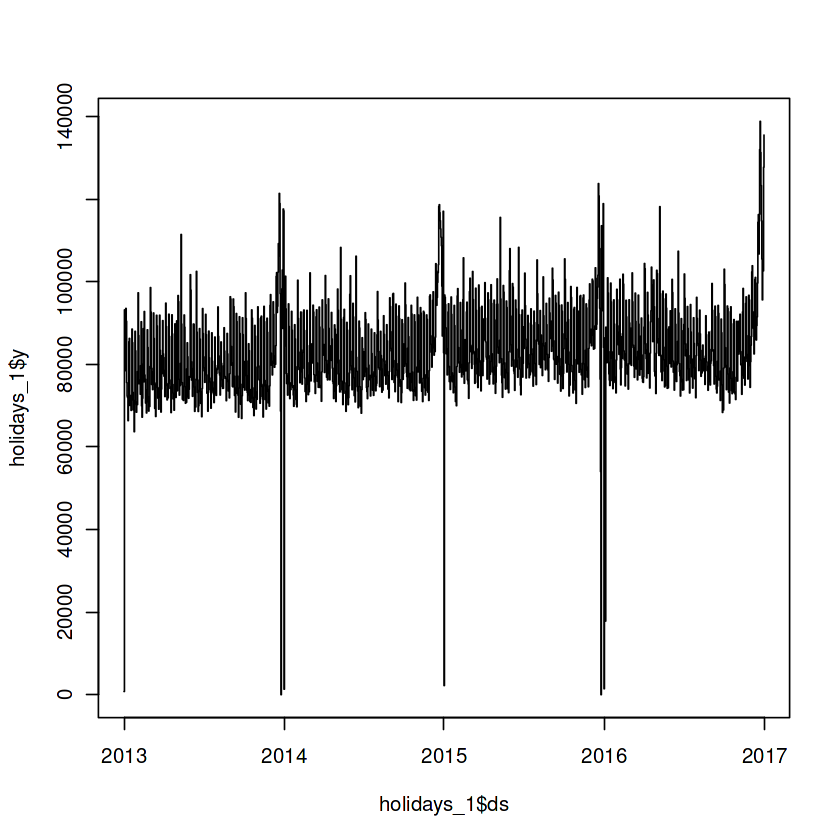

In [17]:
plot(holidays_1$ds,holidays_1$y, type = "s")

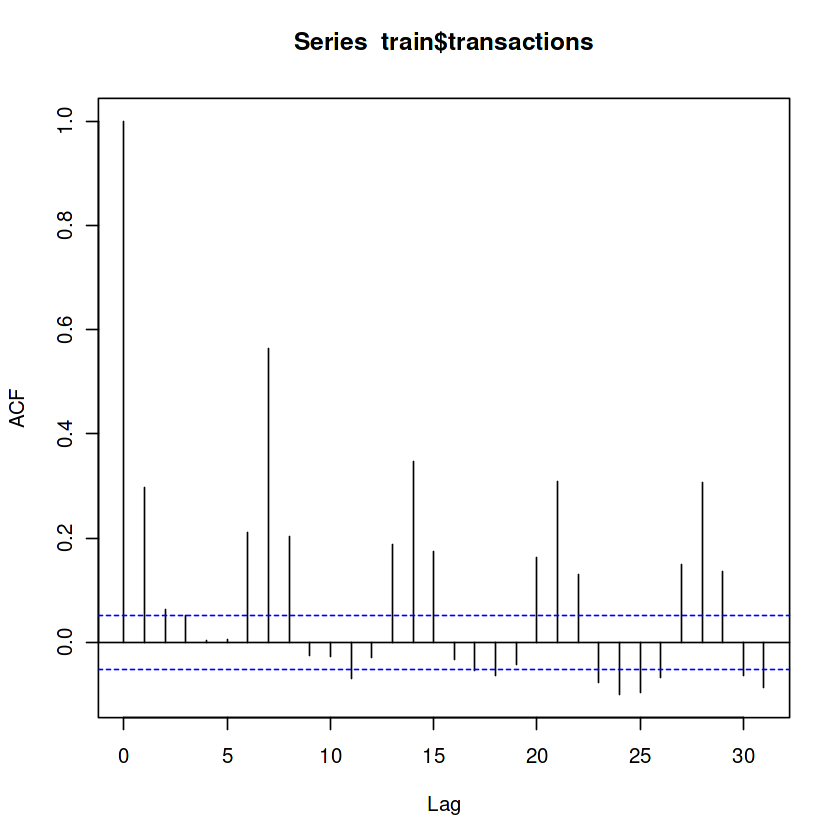

In [18]:
acf(train$transactions)

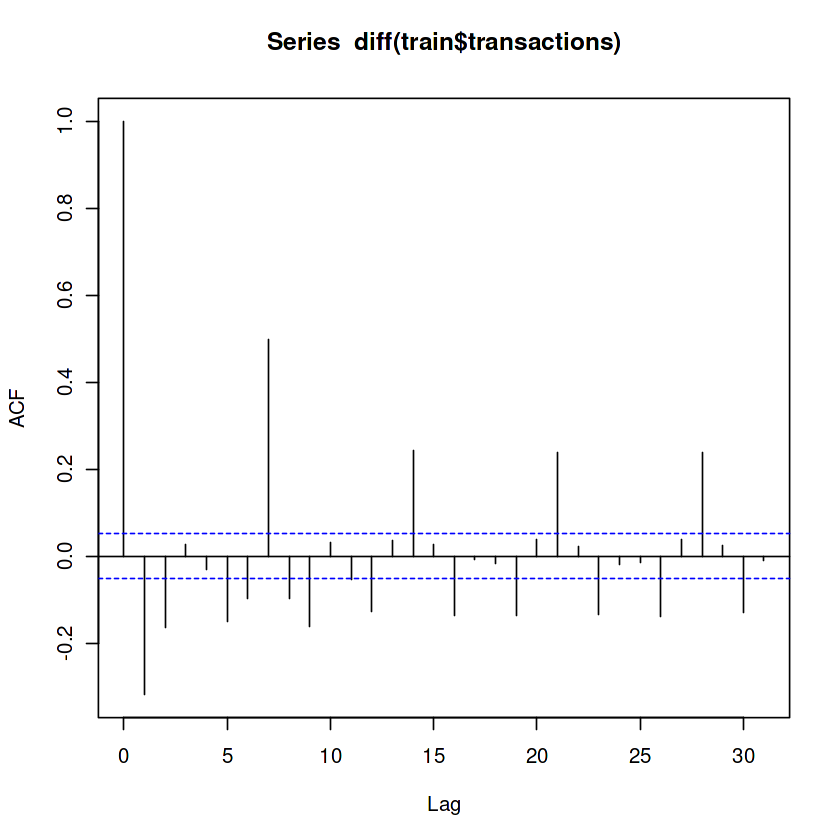

In [19]:
acf(diff(train$transactions))

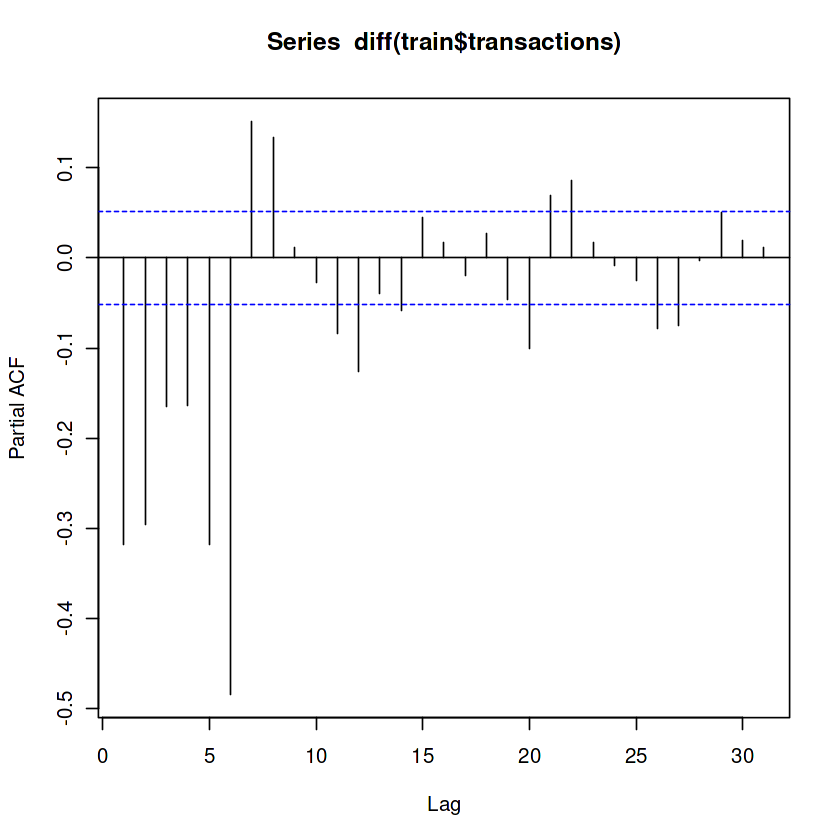

In [20]:
pacf(diff(train$transactions))

# 7. Building Prophet Forecasting Model

In [21]:
date_range1 <- seq(as.Date("2013/01/01"), by = "day", length.out = 1826)
date_range1_DF <- data.frame(date_range1,as.integer(0))
colnames(date_range1_DF) <- c('date','holiday')
holidays_till_2017 <- left_join(date_range1_DF,holidays,by='date')
holidays2_till_2017 <- data.frame(holidays_till_2017$date,holidays_till_2017$holiday.y)
colnames(holidays2_till_2017) <- c('ds','holiday')
colSums(is.na(holidays2_till_2017))
holidays2_till_2017$holiday[is.na(holidays2_till_2017$holiday)] <- 0
colSums(is.na(holidays2_till_2017))
head(holidays2_till_2017)
tail(holidays2_till_2017)

ds holiday 
      0    1549

ds holiday 
      0       0

,ds,holiday
,<date>,<dbl>
1,2013-01-01,1
2,2013-01-02,0
3,2013-01-03,0
4,2013-01-04,0
5,2013-01-05,1
6,2013-01-06,0


,ds,holiday
,<date>,<dbl>
1821,2017-12-26,1
1822,2017-12-27,0
1823,2017-12-28,0
1824,2017-12-29,0
1825,2017-12-30,0
1826,2017-12-31,0


In [22]:
m = prophet(changepoint.prior.scale = 0.1,seasonality.prior.scale=1)
m <- add_seasonality(m, name='monthly', period=30.5, fourier.order=5)

In [23]:
m = add_regressor(m,'holiday',standardize = FALSE)
m = fit.prophet(m, df = holidays_1)

Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.



# 8. Forecasting

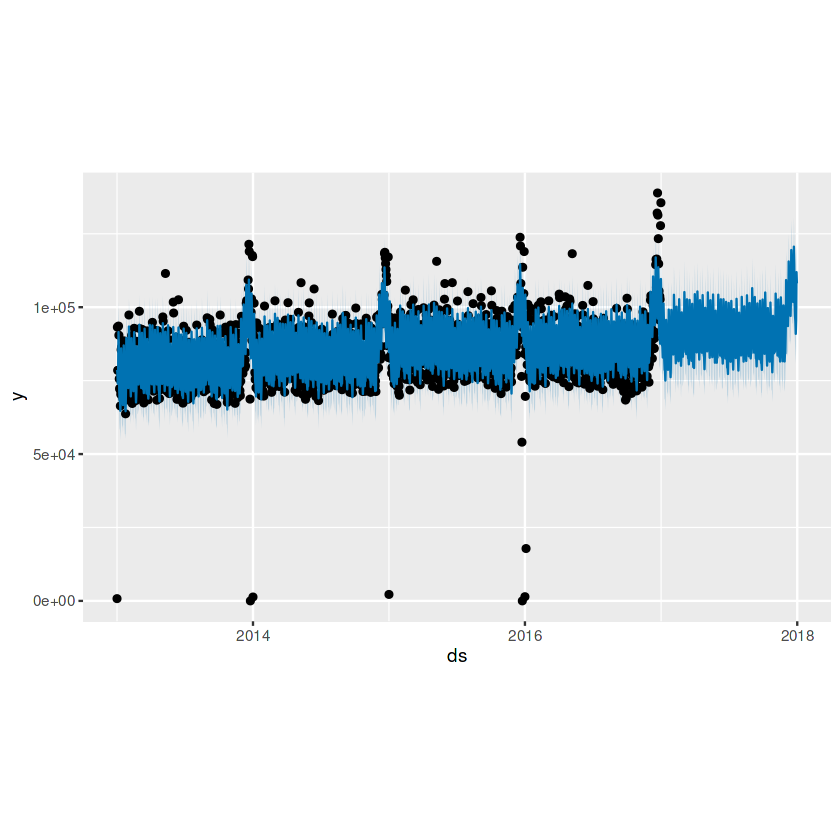

In [24]:
future <- make_future_dataframe(m, periods = 365,include_history = TRUE)
future$holiday <- holidays2_till_2017$holiday
forecast <- predict(m, future)
plot(m, forecast)

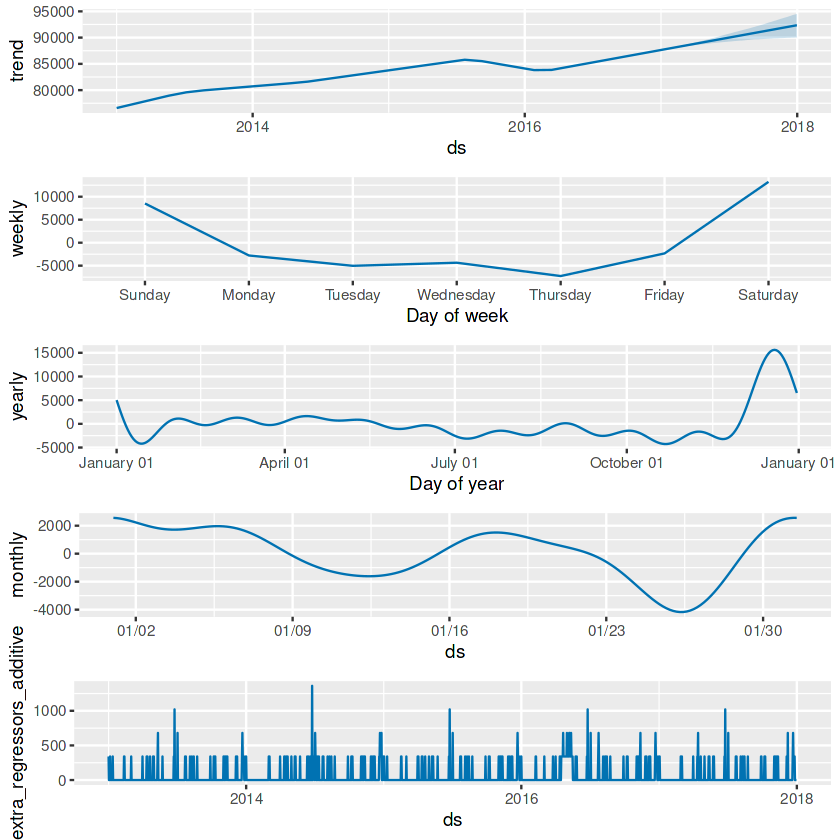

In [25]:
prophet_plot_components(m, forecast)

In [26]:
predict <- data.frame(forecast$ds,forecast$yhat)

# 9. Evaluation

In [27]:
yhat_org <- predict %>% filter(forecast.ds >= as.Date("2013-01-01") & forecast.ds < as.Date("2017-01-01"))
compare <- data.frame(holidays_1$y,yhat_org$forecast.yhat)
colnames(compare) <- c("Actual Values", "forecasted Values")
res <- holidays_1$y - yhat_org$forecast.yhat

Warning message in base::check_tzones(e1, e2):
“'tzone' attributes are inconsistent”
Warning message in base::check_tzones(e1, e2):
“'tzone' attributes are inconsistent”


Checking Normality

In [28]:
Box.test(res, type = "Ljung-Box")


	Box-Ljung test

data:  res
X-squared = 86.358, df = 1, p-value < 2.2e-16


In [29]:
sq_error<- (holidays_1$y - yhat_org$forecast.yhat)^2
MSE <- mean(sq_error)
RMSE <- sqrt(MSE)
RMSE

[1] 7740.012

# 10. Creating Submission File

In [30]:
prediction_final <- predict %>% filter(forecast.ds >= as.Date("2017-01-01") & forecast.ds < as.Date("2017-08-16"))
colnames(prediction_final) <- c("date", "forecast.yhat")
prediction_final$forecast.yhat <- round(prediction_final$forecast.yhat,0)
test$date<-as.Date(test$date, format="%d-%m-%Y")
prediction_final_id <- left_join(test,prediction_final, by='date')

Warning message in base::check_tzones(e1, e2):
“'tzone' attributes are inconsistent”
Warning message in base::check_tzones(e1, e2):
“'tzone' attributes are inconsistent”


In [31]:
submission <- data.frame(prediction_final_id$id,prediction_final_id$forecast.yhat)
colnames(submission) <- c("id", "transactions")
submission$transactions[submission$id == '0'] <- 1433
head(submission)
tail(submission)
write.csv(submission,"submission.csv", row.names = FALSE, na = '0')

,id,transactions
,<int>,<dbl>
1,0,1433
2,1,91277
3,2,87136
4,3,86635
5,4,82890
6,5,86919


,id,transactions
,<int>,<dbl>
222,221,81486
223,222,85606
224,223,100294
225,224,95345
226,225,84067
227,226,82498
